In [1]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_rows', 10)

Nomenklatur:
- `PasengerId` type should be integers
- `Survived` Survived or not
- `Pclass` Class of Travel (1st paling tinggi dan mahal)
- `Name` Name of Passenger
- `Sex` Gender
- `Age`
- `SibS` Number of Sibling/Spouse aboard
- `Parch` Number of parent/child aboard
- `Ticket`
- `Fare`
- `Cabin`
- `Embarked` The port in which a passenger has embarked. C - Cherbourg, S - Southhampton, ! = Queenstown

In [5]:
df = pd.read_csv("titanic-train.csv", index_col="PassengerId")
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.drop(["Name", "Ticket"], axis=1, inplace=True)

## Quick EDA

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Ternyata Fitur `Age` dan `Cabin` memiliki data yang hilang sampai 20% dan 77%. Kita coba berpikir simple dulu dan buang saja fitur ini dibanding *impute*.
Berikut visualisasi data yang hilang

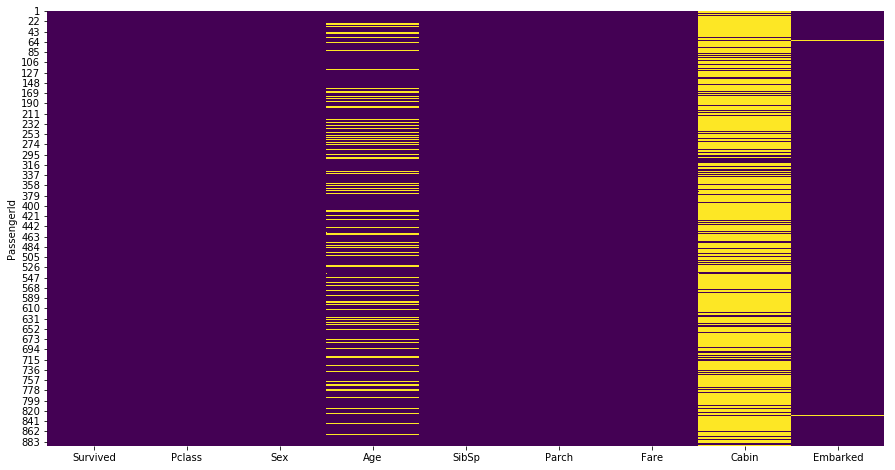

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

In [11]:
df.drop(["Age", "Cabin"], axis=1, inplace=True)

Untuk variable embarked, kita impute karena hanya 2 saja yang kosong. Karena dia kategorikal, mending pakai modus dari datanya

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df.fillna({"Embarked": "S"}, inplace=True)

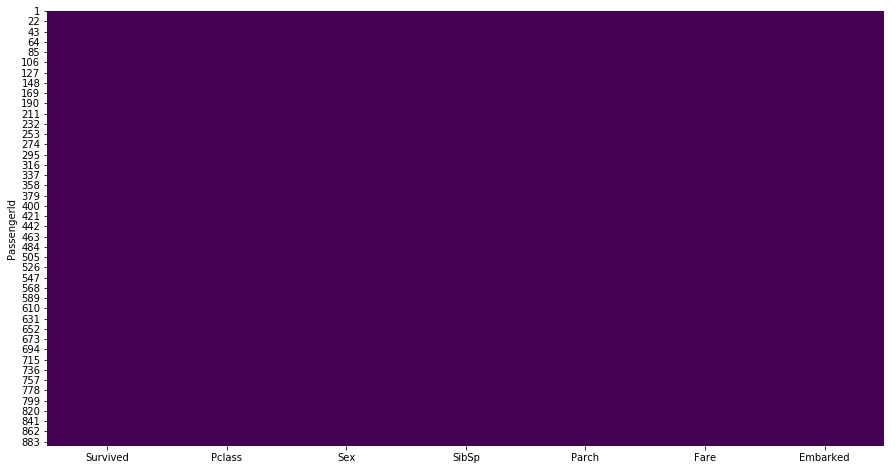

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

## Data Preparation

In [15]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [16]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,S
888,1,1,female,0,0,30.0000,S
889,0,3,female,1,2,23.4500,S


In [17]:
df[:]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,S
888,1,1,female,0,0,30.0000,S
889,0,3,female,1,2,23.4500,S


In [23]:
X = df.iloc[:, 1:]
y = df['Survived']

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [24]:
X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,0,1,0,0,1
888,0,0,30.0000,1,0,0,1,0,0,0,1
889,1,2,23.4500,0,0,1,1,0,0,0,1


## Linear Regression

In [26]:
data = pd.read_csv('../week5B/headbrain.csv')

In [27]:
# Collectiing X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [29]:
# Calculate coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

In [30]:
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

In [31]:
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

In [32]:
# Print hasil coefficients
print("Coefficients")
print(b1, b0)

Coefficients
0.26342933948939945 325.57342104944223


In [33]:
# Plot Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

In [34]:
# Plot line
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

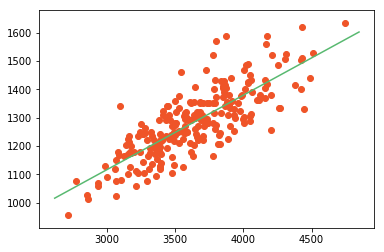

In [35]:
# Plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, color='#ef5428', label='Scatter Plot')

In [38]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i]- y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

# Calculate R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res)/(ss_tot)
print("R2 Scores")
print(r2)

RMSE
72.1206213783709
R2 Scores
0.6393117199570003


### Using scikit

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
n = len(X)

Intercept: 325.5734210494428
Coef 1: 0.2634293394893993


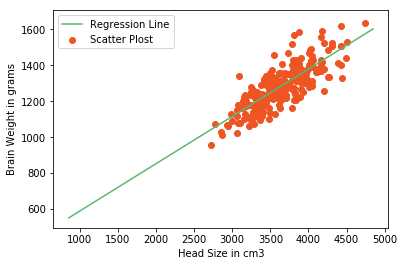

In [49]:
# Define Class
reg = LinearRegression()
X = X.reshape((n, 1))
# Data fitting
reg = reg.fit(X, Y)
# Y Prediction
y_pred = reg.predict(X)
b0 = reg.intercept_
b1 = reg.coef_[0]
print('Intercept: {}'.format(b0))
print('Coef 1: {}'.format(b1))

# plotting
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values
x = np.linspace(min_x, max_x, len(X))
y = b0 + b1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plost')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()

In [46]:
# Model Evaluation

In [47]:
rmse = np.sqrt(mean_squared_error(Y, y_pred))
r2 = reg.score(X, Y)

In [50]:
print(rmse, r2)

72.1206213783709 0.639311719957
